In [1]:
from keras.models import Sequential
import numpy as np
import cv2
import os
import random
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Input
from keras.layers import Activation, Dense, Dropout, Flatten, Input, Convolution2D, MaxPooling2D,concatenate 
from keras.layers.merge import concatenate
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from livelossplot import PlotLossesKerasTF

import os

ModuleNotFoundError: No module named 'keras.layers.merge'

In [2]:
#!pip install tensorflow-gpu
#!pip install opencv-python
#!pip install matplotlib
#!pip install livelossplot

In [7]:
DIRECTORY=r'C:\MyMaskD/train'

CATEGORIES=['positive','neutral','negative']



In [8]:
IMG_SIZE =100
training = []
def createTrainingData():
    for category in CATEGORIES:
        path = os.path.join(DIRECTORY, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            training.append([new_array, class_num])



In [9]:
createTrainingData()



In [10]:
#!pip install os-sys

In [11]:
import random

random.shuffle(training)


In [12]:
for sample in training[:21]:
    print(sample[1])

0
1
1
0
1
1
0
2
1
2
1
0
1
0
1
0
1
1
0
0
0


In [13]:
x =[]
y =[]
for features, label in training:
    x.append(features)
    y.append(label)
#print(x)




In [14]:
x = np.array(x).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
print(x)




[[[[  0]
   [  0]
   [  0]
   ...
   [  0]
   [  0]
   [  0]]

  [[  0]
   [  0]
   [  0]
   ...
   [  0]
   [  0]
   [  0]]

  [[  0]
   [  0]
   [  0]
   ...
   [  0]
   [  0]
   [  0]]

  ...

  [[  0]
   [  0]
   [  0]
   ...
   [  0]
   [  0]
   [  0]]

  [[  0]
   [  0]
   [  0]
   ...
   [  0]
   [  0]
   [  0]]

  [[  0]
   [  0]
   [  0]
   ...
   [  0]
   [  0]
   [  0]]]


 [[[  0]
   [  0]
   [  2]
   ...
   [  0]
   [  0]
   [  0]]

  [[  0]
   [  0]
   [  2]
   ...
   [  0]
   [  0]
   [  0]]

  [[  0]
   [  0]
   [  2]
   ...
   [  0]
   [  0]
   [  0]]

  ...

  [[  0]
   [  0]
   [  0]
   ...
   [  0]
   [  0]
   [  0]]

  [[  0]
   [  0]
   [  0]
   ...
   [  0]
   [  0]
   [  0]]

  [[  0]
   [  0]
   [  0]
   ...
   [  0]
   [  0]
   [  0]]]


 [[[  3]
   [  3]
   [180]
   ...
   [ 10]
   [  3]
   [  1]]

  [[ 11]
   [  5]
   [177]
   ...
   [  6]
   [  2]
   [  0]]

  [[  4]
   [ 48]
   [186]
   ...
   [ 17]
   [  6]
   [  2]]

  ...

  [[  4]
   [  2]
   [  2]
   

In [15]:

from tensorflow.keras.utils import to_categorical
from keras.utils import np_utils

training_set = x.astype('float32')
training_set /= 255
Y = np_utils.to_categorical(y, 3)
print(Y[13])




[1. 0. 0.]


In [16]:
print(training_set.shape)


(9307, 100, 100, 1)


In [17]:
print(Y.shape) # (3,)
#Y1=preprocess(numpy.array(Y))
Y= np.array (Y)
print (Y.shape)
print(Y)

NameError: name 'Y1' is not defined

In [19]:
from tensorflow.python.keras import optimizers as opt
import tensorflow as tf
from tensorflow.keras.layers import Conv2D
from tensorflow import keras
from tensorflow.keras.layers import BatchNormalization
from keras.regularizers import l2

#conv1 = Conv2D(32, kernel_size=4, activation='relu')(inputs1)
#pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
#conv2 = Conv2D(64, kernel_size=4, activation='relu')(pool1)
#pool12 = MaxPooling2D(pool_size=(2, 2))(conv2)
##first1=Dropout(0.05)(pool2)
inputs1 = Input(shape=(IMG_SIZE,IMG_SIZE,1),name = 'I1')

conv1 = Conv2D(64, 3, activation = 'relu',kernel_regularizer=l2(0.0001))(inputs1)
conv2 = Conv2D(64, 3, activation = 'relu')(conv1)
pool1 = MaxPooling2D(pool_size=(2, 2),strides=2, padding='same')(conv2)
#-------------------------------------------------------------------------
conv3 = Conv2D(128, 3, activation = 'relu',kernel_regularizer=l2(0.0001))(pool1)
conv4 = Conv2D(128, 3, activation = 'relu')(conv3)
pool2 = MaxPooling2D(pool_size=(2, 2),strides=2, padding='same')(conv4)
#-------------------------------------------------------------------------
conv5 = Conv2D(256, 3, activation = 'relu',kernel_regularizer=l2(0.0001))(pool2)
print(conv5.shape)
conv6 = Conv2D(256, 3, activation = 'relu')(conv5)
print(conv6.shape)
pool3 = MaxPooling2D(pool_size=(2, 2),strides=2, padding='same')(conv6)
#-------------------------------------------------------------------------
conv7 = Conv2D(512, 3, activation = 'relu',kernel_regularizer=l2(0.0001))(pool3)
#conv8 = Conv2D(512, 3, activation = 'relu')(conv7)
#print(conv8.shape)
pool4 = MaxPooling2D(pool_size=(2, 2),strides=2, padding='same')(conv7)
#flat_1 = Flatten()(pool4)


M = Flatten()(pool4)
fc1=Dense(4096, activation='relu')(M)
B1=BatchNormalization()(fc1)
D1=Dropout(0.3)(fc1)
fc2=Dense(2048, activation='relu')(D1)
B2=BatchNormalization()(fc2)

D2=Dropout(0.3)(B2)
fc3=Dense(1024, activation='relu')(D2)
B3=BatchNormalization()(fc3)
D3=Dropout(0.3)(B3)
output = Dense(3, activation='softmax' )(D3)



model = Model(inputs=inputs1, outputs=output)


#    model = Model(inputs=[lstm_output.input,input2], outputs=[output1,output2])
opt = tf.keras.optimizers.Adam(learning_rate=0.0003)
model.compile(optimizer=opt, loss='categorical_crossentropy',
               metrics=['accuracy'])
model.summary()

(None, 20, 20, 256)
(None, 18, 18, 256)
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
I1 (InputLayer)              [(None, 100, 100, 1)]     0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 98, 98, 64)        640       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 96, 96, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 46, 46, 128)       73856     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 44, 44, 128)       147584    
_________________________________________________________________
max_pooling2d_

In [20]:
!pip install plotLosseskeras

ERROR: Could not find a version that satisfies the requirement plotLosseskeras (from versions: none)
ERROR: No matching distribution found for plotLosseskeras
You should consider upgrading via the 'C:\Users\Shahzad Dar\anaconda3\envs\Tensorflow\python.exe -m pip install --upgrade pip' command.


In [21]:
from livelossplot import PlotLossesKeras
from livelossplot.inputs.tf_keras import PlotLossesCallback
from livelossplot import PlotLossesKeras
plotlosses = PlotLossesKeras()


reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=2, min_lr=0.00001, mode='auto')

checkpoint = ModelCheckpoint("tess.h5", monitor='val_accuracy',
                             save_weights_only=True, mode='max', verbose=2)

callbacks = [PlotLossesCallback(), checkpoint, reduce_lr]

In [ ]:
history = model.fit(x=training_set, y=Y, epochs=7, batch_size=32 , callbacks=[PlotLossesKeras()] )

Epoch 1/7
 17/291 [>.............................] - ETA: 31:50 - loss: 1.9109 - accuracy: 0.3603

In [18]:
#history = model.fit( x=[training_set,training_set1], y=Y1, epochs=35, batch_size=35,validation_split=0.1)


In [19]:

DIRECTORY1=r'C:\MyMaskD/eval'

CATEGORIES=['positive','neutral','negative']


In [20]:

IMG_SIZE =100
testing1 = []
def createTestingDataT1():
    for category1 in CATEGORIES:
        path = os.path.join(DIRECTORYT1, category1)
        class_num1 = CATEGORIES.index(category1)
        for img in os.listdir(path):
            img_array1 = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            new_array1 = cv2.resize(img_array1, (IMG_SIZE, IMG_SIZE))
            testing1.append([new_array1, class_num1])

In [21]:

createTestingDataT1()


In [22]:


xT1 =[]
yT1 =[]
for features1, label1 in testing1:
    xT1.append(features1)
    yT1.append(label1)
#print(xT1)


In [23]:

xT1 = np.array(xT1).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
#print(x1)

In [24]:
from tensorflow.keras.utils import to_categorical
from keras.utils import np_utils


testing_set1 = xT1.astype('float32')
testing_set1 /= 255

YT1 = np_utils.to_categorical(yT1, 3)
print(YT1[2])


[1. 0. 0.]
[1. 0. 0.]


In [25]:
print(testing_set.shape)


(1155, 100, 100, 1)


In [26]:
scores = model.evaluate(x=testing_set1, y=YT1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 99.91%


In [27]:
predictions = model.predict([testing_set,testing_set1],batch_size=32, verbose=1)


37/37 [==============================] - 43s 1s/step


In [28]:
print('First prediction:', predictions[0]) 
print('second prediction:',predictions[1])
print('third prediction:',predictions[2])
print('fourth prediction:',predictions[122])


First prediction: [9.99998927e-01 1.17912556e-07 9.66251037e-07]
second prediction: [9.9999952e-01 2.9136197e-08 5.3086580e-07]
third prediction: [9.9999964e-01 3.2523362e-09 4.0902162e-07]
fourth prediction: [9.9999905e-01 1.2884760e-07 8.3177537e-07]


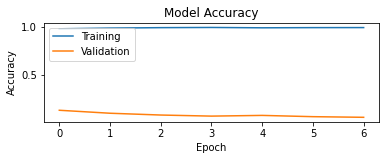

In [29]:
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')

In [30]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


In [31]:
print(YT1)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [32]:
p=model.predict([testing_set,testing_set1])
print(p)

[[9.99998927e-01 1.17912556e-07 9.66251037e-07]
 [9.99999523e-01 2.91361975e-08 5.30865805e-07]
 [9.99999642e-01 3.25233618e-09 4.09021624e-07]
 ...
 [2.72621401e-06 6.31631906e-07 9.99996662e-01]
 [4.88600472e-06 1.90108409e-08 9.99995112e-01]
 [4.53126035e-14 6.77076057e-14 1.00000000e+00]]


In [33]:
labels = np.argmax(p, axis=-1)    
print(labels[:300])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]


In [34]:
labels = (p > 0.5).astype(int)
print(labels)

[[1 0 0]
 [1 0 0]
 [1 0 0]
 ...
 [0 0 1]
 [0 0 1]
 [0 0 1]]


In [35]:
print (len(labels))
print(len(p))

1155
1155


In [36]:
print(len(yT1))


1155


In [37]:
#use maxarg

In [38]:
print(YT1)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [39]:
import numpy as np
rounded_YT1=np.argmax(YT1, axis=1)
rounded_labels=np.argmax(labels,axis=1)
print(rounded_labels[2:10])
print(rounded_YT1[1:10])

[0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0]


In [40]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
cm = confusion_matrix(rounded_labels,rounded_YT1)
print(cm)

[[644   0   0]
 [  0 416   1]
 [  0   0  94]]


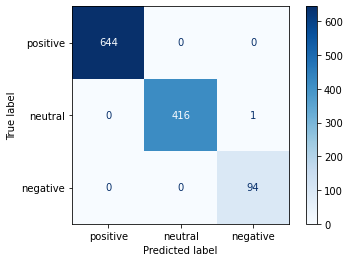

In [41]:
file:///C:/Users/talha/Desktop/sample/output.html

In [42]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
cm = confusion_matrix(labels,YT1)
print(cm)

ValueError: multilabel-indicator is not supported